# Asymmetry models evaluation and Metrics 

This notebook shows all the process of evaluation for the 4 models built in the modeling stage for laterality detection. The metrics that
are going to be listed are the following:

- Accuracy
- Precision
- Recall / Sensitivity
- F1 Score
- Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
- Area Under the Precision-Recall Curve (AUC-PR)
- Confusion Matrix

## Requiered Imports

In [1]:
import pickle

import numpy as np
import tensorflow as tf

from tensorflow.keras.saving import load_model


from src.settings import ROOT_DIR
from src.utils.data_split import get_features_target
from src.evaluation.model_metrics_report import print_model_metrics

C:\Users\julia\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (5.2.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


## Data load

In [2]:
test_data_path = ROOT_DIR / 'data' / 'processed' / 'asa' / 'test.pkl'

with open(test_data_path, 'rb') as file:
    test_data = pickle.load(file)

In [3]:
len(test_data)

17

In [4]:
X_test, y_test = get_features_target(test_data)

In [5]:
max_length = max(len(x) for x in X_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', dtype='float32')

y_test = np.array(y_test)

## Models loading

In [6]:
results_path = ROOT_DIR / 'results' / 'asa'

In [ ]:
lstm_no_hidden = load_model(results_path / 'lstm-no-hidden' / 'tmp' / 'ckpt' / 'checkpoint.model.keras')
lstm_1hidden = load_model(results_path / 'lstm-1hidden' / 'tmp' / 'ckpt' / 'checkpoint.model.keras')
lstm_1hidden_1dconv = load_model(results_path / 'lstm-1hidden-1dconv' / 'tmp' / 'ckpt' / 'checkpoint.model.keras')
lstm_1hidden_1dconv_do =load_model(results_path / 'lstm-1hidden-1dconv-do' / 'tmp' / 'ckpt' / 'checkpoint.model.keras')

## Models Evaluation

### Simple LSTM (No hidden Layers)

1/1 [==============================] - 3s 3s/step
Accuracy: 0.5882352941176471
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.00      0.00      0.00         7

    accuracy                           0.59        17
   macro avg       0.29      0.50      0.37        17
weighted avg       0.35      0.59      0.44        17

AUC-ROC: 0.5
AUC-PR: 0.7058823529411764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


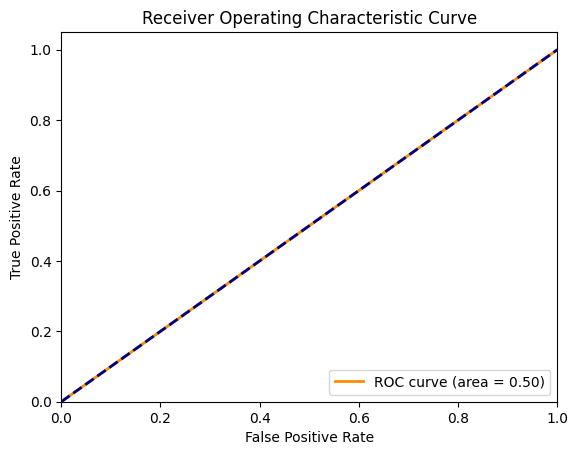

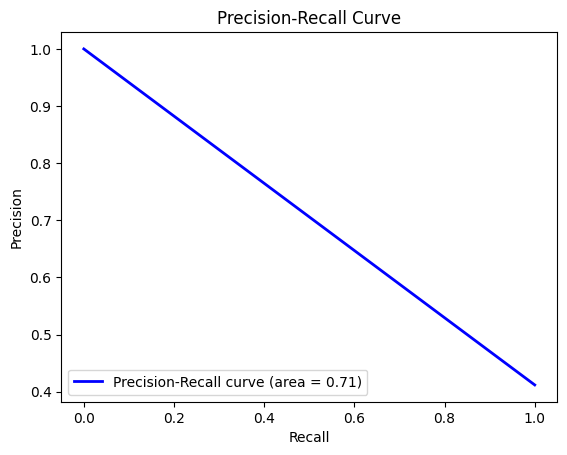

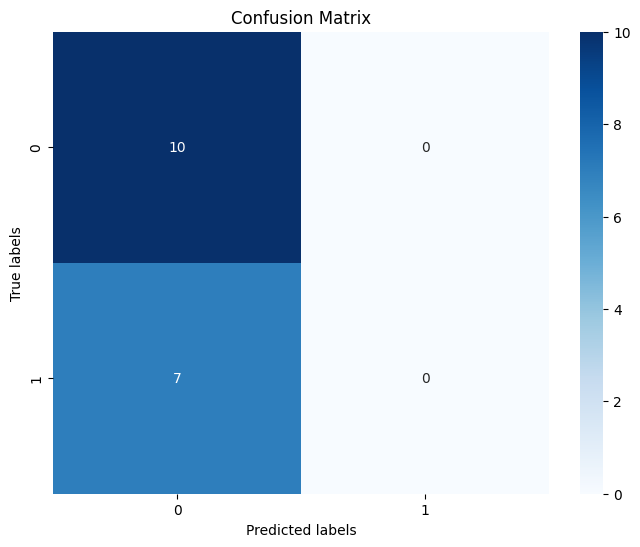

In [9]:
print_model_metrics(lstm_no_hidden, X_test, y_test)

### LSTM 1 Hidden Layer

1/1 [==============================] - 11s 11s/step
Accuracy: 0.5882352941176471
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.00      0.00      0.00         7

    accuracy                           0.59        17
   macro avg       0.29      0.50      0.37        17
weighted avg       0.35      0.59      0.44        17

AUC-ROC: 0.4071428571428571
AUC-PR: 0.4395758303321328


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


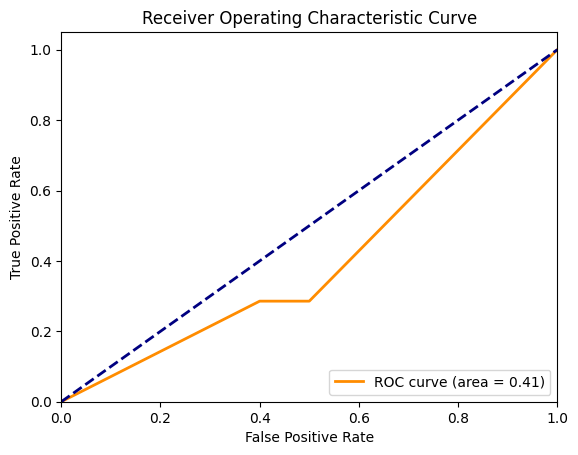

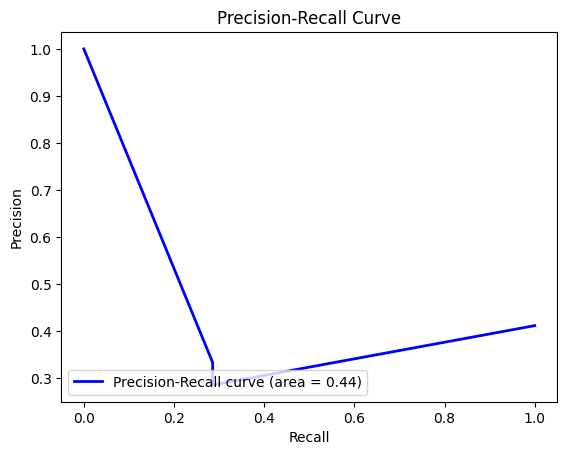

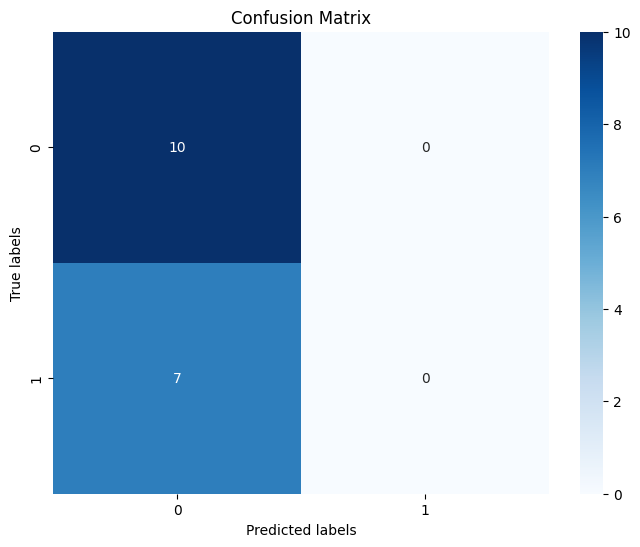

In [10]:
print_model_metrics(lstm_1hidden, X_test, y_test)

### LSTM 1 Hidden Layer with 1 Conv1D

1/1 [==============================] - 4s 4s/step
Accuracy: 0.5882352941176471
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.00      0.00      0.00         7

    accuracy                           0.59        17
   macro avg       0.29      0.50      0.37        17
weighted avg       0.35      0.59      0.44        17

AUC-ROC: 0.7142857142857143
AUC-PR: 0.687898113790971


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


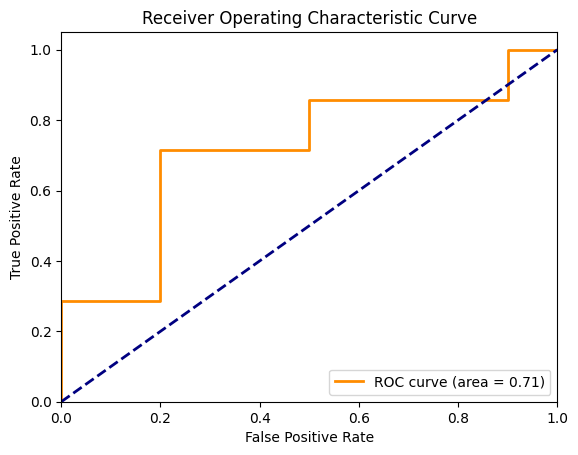

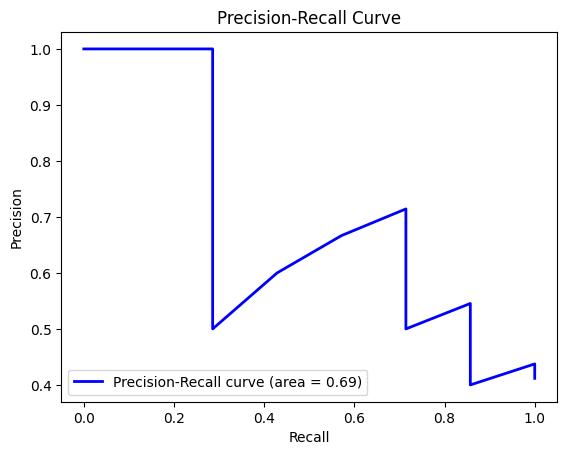

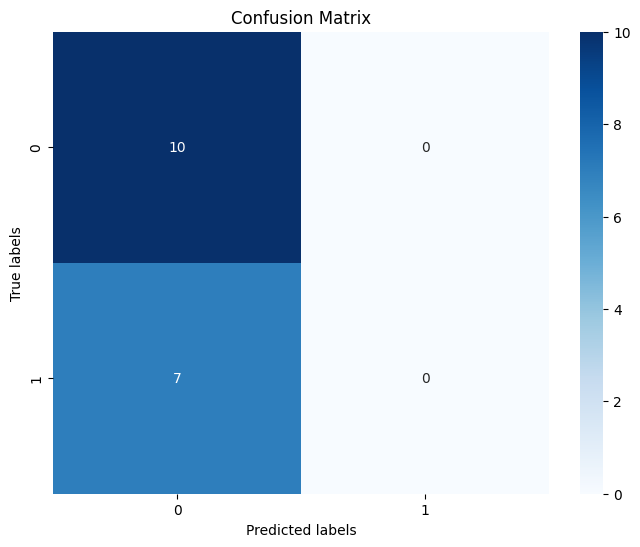

In [9]:
print_model_metrics(lstm_1hidden_1dconv, X_test, y_test, contains_conv=True)

### LSTM 1 Hidden Layer with 1 Conv1D and Dropout

1/1 [==============================] - 4s 4s/step
Accuracy: 0.5882352941176471
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.00      0.00      0.00         7

    accuracy                           0.59        17
   macro avg       0.29      0.50      0.37        17
weighted avg       0.35      0.59      0.44        17

AUC-ROC: 0.6571428571428571
AUC-PR: 0.49417645846217273


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


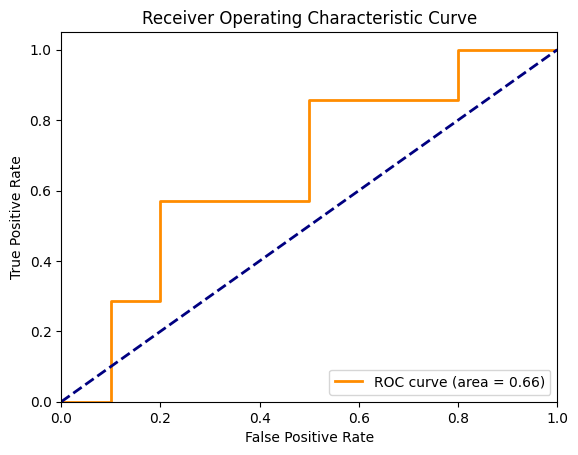

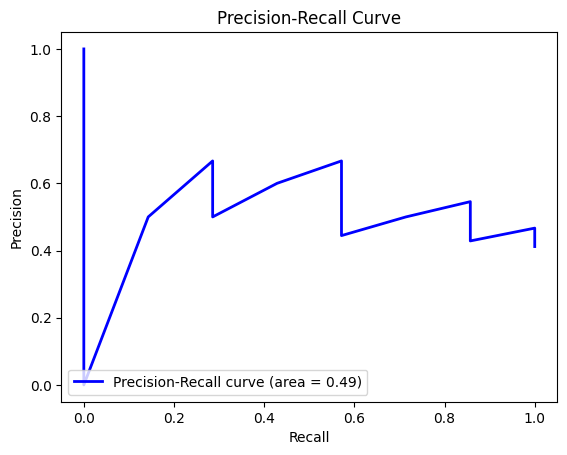

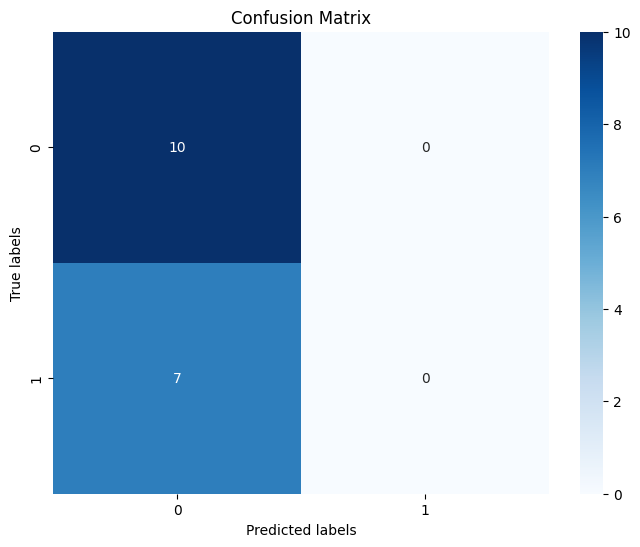

In [10]:
print_model_metrics(lstm_1hidden_1dconv_do, X_test, y_test, contains_conv=True)